## **Title: POPULATION MOVEMENT IN COOK COUNTY, ILLINOIS USA (2019-2023)**

By: Nurul Hakimah Mohd Zaki

### **Problem Statement:** 

TTraffic congestion in the US has gotten worse over the past year. According to Inrix, the average driver in the US spent time 29% more than in 2021, equivalent to $134 more spent on fuel in a year. This problem is expected as US population has steadily increased by 300 million people every year. By modelling the population movements, the pattern can be analyzed to determine the needs for significant changes that require attention by the town ship planner. local and federal governing bodies. Modelling and forecasting were done for Cook County, IL, where Chicago as the second most congested city in the world is located. 

**Data Source:**
1. https://www.kaggle.com/datasets/adelanseur/trips-by-distance
2. Time Series Analysis and Forecasting – GeeksforGeeks
3. The Complete Guide to Time Series Forecasting Models | by Peter Wainaina | Medium
4. Chandler-Wilde, H. (2023, January 10). Bloomberg - These are the 	world’s most congested cities. www.bloomberg.com. Retrieved 	May 31, 2024, 	from https://www.bloomberg.com/news/articles/2023-01-10/these-are-the-world-s-most-congested-cities
5. INRIX 2022 Global Traffic Scorecard: London Tops List as Most Congested City, U.S. Cities Inch Closer. (2023). In https://inrix.com. Retrieved May 25, 2024, from https://inrix.com/press-releases/2022-global-traffic-scorecard-uk/


**IMPORTING DATASET**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Trips_by_Distance.csv')

**EXPLORATORY DATA ANALYSIS (EDA)**

In [3]:
df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [4]:
df.tail()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
5158305,State,2023/05/13,10.0,DE,NaN,NaN,207175.0,766589.0,4246544.0,1165812.0,...,665996.0,604944.0,211563.0,77705.0,27825.0,2539.0,1868.0,10-00000-20230513,19,5
5158306,State,2023/05/13,23.0,ME,NaN,NaN,280632.0,1063580.0,6583303.0,1558733.0,...,1061170.0,1136820.0,388208.0,116973.0,32262.0,2997.0,2816.0,23-00000-20230513,19,5
5158307,State,2023/05/13,40.0,OK,NaN,NaN,776457.0,3180514.0,17327256.0,4452562.0,...,2628389.0,2854007.0,992364.0,419688.0,174570.0,22453.0,9229.0,40-00000-20230513,19,5
5158308,State,2023/05/13,55.0,WI,NaN,NaN,1144267.0,4678167.0,29285138.0,8096984.0,...,4408321.0,4389944.0,1547450.0,617609.0,275080.0,31478.0,15967.0,55-00000-20230513,19,5
5158309,State,2023/05/13,54.0,WV,NaN,NaN,373594.0,1418553.0,7999326.0,1972614.0,...,1277561.0,1225345.0,438822.0,162201.0,74367.0,10517.0,2323.0,54-00000-20230513,19,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158310 entries, 0 to 5158309
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Level                           object 
 1   Date                            object 
 2   State FIPS                      float64
 3   State Postal Code               object 
 4   County FIPS                     float64
 5   County Name                     object 
 6   Population Staying at Home      float64
 7   Population Not Staying at Home  float64
 8   Number of Trips                 float64
 9   Number of Trips <1              float64
 10  Number of Trips 1-3             float64
 11  Number of Trips 3-5             float64
 12  Number of Trips 5-10            float64
 13  Number of Trips 10-25           float64
 14  Number of Trips 25-50           float64
 15  Number of Trips 50-100          float64
 16  Number of Trips 100-250         float64
 17  Number of Trips 250-500    

In [6]:
df.isnull().sum()  # Null values are redundant numbers, which are the sum of each county and states.

Level                                 0
Date                                  0
State FIPS                         1615
State Postal Code                  1615
County FIPS                       83980
County Name                       83980
Population Staying at Home        42861
Population Not Staying at Home    42861
Number of Trips                   42861
Number of Trips <1                42861
Number of Trips 1-3               42861
Number of Trips 3-5               42861
Number of Trips 5-10              42861
Number of Trips 10-25             42861
Number of Trips 25-50             42861
Number of Trips 50-100            42861
Number of Trips 100-250           42861
Number of Trips 250-500           42861
Number of Trips >=500             42861
Row ID                                0
Week                                  0
Month                                 0
dtype: int64

In [7]:
# Filter the DataFrame for rows where the 'County Name' is "Cook County" and 'State Postal Code' is "IL" as the main focus area.
df_filtered = df[(df['County Name'] == "Cook County") & (df['State Postal Code'] == "IL")]
df_filtered

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
48725,County,2019/01/01,17.0,IL,17031.0,Cook County,1396803.0,3753430.0,15198911.0,4832245.0,...,2048283.0,1967193.0,611265.0,120727.0,110623.0,33141.0,30570.0,17-17031-20190101,0,1
49939,County,2019/01/02,17.0,IL,17031.0,Cook County,1113847.0,4036386.0,19223606.0,5761425.0,...,2793768.0,2764012.0,748106.0,120925.0,113753.0,33345.0,27671.0,17-17031-20190102,0,1
53072,County,2019/01/03,17.0,IL,17031.0,Cook County,1130134.0,4020099.0,19640570.0,5829954.0,...,2943410.0,2765745.0,735533.0,119774.0,117008.0,36312.0,29032.0,17-17031-20190103,0,1
56753,County,2019/01/04,17.0,IL,17031.0,Cook County,1100928.0,4049305.0,19961918.0,5853756.0,...,3045365.0,2823805.0,734956.0,120149.0,122384.0,35505.0,29028.0,17-17031-20190104,0,1
61233,County,2019/01/05,17.0,IL,17031.0,Cook County,1141428.0,4008805.0,20239858.0,6050570.0,...,2995651.0,2639569.0,704066.0,131182.0,120787.0,34039.0,25696.0,17-17031-20190105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141723,County,2023/05/09,17.0,IL,17031.0,Cook County,1224914.0,3925319.0,23901073.0,7979889.0,...,3394861.0,3067993.0,818084.0,165548.0,121775.0,50013.0,40331.0,17-17031-20230509,19,5
5144866,County,2023/05/10,17.0,IL,17031.0,Cook County,1240860.0,3909373.0,22265885.0,7230722.0,...,3196953.0,2964641.0,802504.0,154999.0,126731.0,54668.0,44225.0,17-17031-20230510,19,5
5147922,County,2023/05/11,17.0,IL,17031.0,Cook County,1130039.0,4020194.0,22988475.0,7588664.0,...,3337173.0,3027338.0,826128.0,168855.0,126463.0,51393.0,39793.0,17-17031-20230511,19,5
5150906,County,2023/05/12,17.0,IL,17031.0,Cook County,1159857.0,3990376.0,23494309.0,7593194.0,...,3415535.0,3116025.0,849827.0,192926.0,155495.0,52419.0,41325.0,17-17031-20230512,19,5


In [8]:
# Drop null values because they are redundant

df_filtered.dropna(inplace=True)
df_filtered

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
48725,County,2019/01/01,17.0,IL,17031.0,Cook County,1396803.0,3753430.0,15198911.0,4832245.0,...,2048283.0,1967193.0,611265.0,120727.0,110623.0,33141.0,30570.0,17-17031-20190101,0,1
49939,County,2019/01/02,17.0,IL,17031.0,Cook County,1113847.0,4036386.0,19223606.0,5761425.0,...,2793768.0,2764012.0,748106.0,120925.0,113753.0,33345.0,27671.0,17-17031-20190102,0,1
53072,County,2019/01/03,17.0,IL,17031.0,Cook County,1130134.0,4020099.0,19640570.0,5829954.0,...,2943410.0,2765745.0,735533.0,119774.0,117008.0,36312.0,29032.0,17-17031-20190103,0,1
56753,County,2019/01/04,17.0,IL,17031.0,Cook County,1100928.0,4049305.0,19961918.0,5853756.0,...,3045365.0,2823805.0,734956.0,120149.0,122384.0,35505.0,29028.0,17-17031-20190104,0,1
61233,County,2019/01/05,17.0,IL,17031.0,Cook County,1141428.0,4008805.0,20239858.0,6050570.0,...,2995651.0,2639569.0,704066.0,131182.0,120787.0,34039.0,25696.0,17-17031-20190105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141723,County,2023/05/09,17.0,IL,17031.0,Cook County,1224914.0,3925319.0,23901073.0,7979889.0,...,3394861.0,3067993.0,818084.0,165548.0,121775.0,50013.0,40331.0,17-17031-20230509,19,5
5144866,County,2023/05/10,17.0,IL,17031.0,Cook County,1240860.0,3909373.0,22265885.0,7230722.0,...,3196953.0,2964641.0,802504.0,154999.0,126731.0,54668.0,44225.0,17-17031-20230510,19,5
5147922,County,2023/05/11,17.0,IL,17031.0,Cook County,1130039.0,4020194.0,22988475.0,7588664.0,...,3337173.0,3027338.0,826128.0,168855.0,126463.0,51393.0,39793.0,17-17031-20230511,19,5
5150906,County,2023/05/12,17.0,IL,17031.0,Cook County,1159857.0,3990376.0,23494309.0,7593194.0,...,3415535.0,3116025.0,849827.0,192926.0,155495.0,52419.0,41325.0,17-17031-20230512,19,5


**CONVERT TO DATETIMEINDEX**

In [9]:
# Ensure the index is a DateTimeIndex and sort it

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])  
df_filtered.set_index('Date', inplace=True)
df_filtered.sort_index(inplace=True)

df_filtered.head()

,Level,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,County,17.0,IL,17031.0,Cook County,1396803.0,3753430.0,15198911.0,4832245.0,3703206.0,...,2048283.0,1967193.0,611265.0,120727.0,110623.0,33141.0,30570.0,17-17031-20190101,0,1
2019-01-02,County,17.0,IL,17031.0,Cook County,1113847.0,4036386.0,19223606.0,5761425.0,4581022.0,...,2793768.0,2764012.0,748106.0,120925.0,113753.0,33345.0,27671.0,17-17031-20190102,0,1
2019-01-03,County,17.0,IL,17031.0,Cook County,1130134.0,4020099.0,19640570.0,5829954.0,4728760.0,...,2943410.0,2765745.0,735533.0,119774.0,117008.0,36312.0,29032.0,17-17031-20190103,0,1
2019-01-04,County,17.0,IL,17031.0,Cook County,1100928.0,4049305.0,19961918.0,5853756.0,4783166.0,...,3045365.0,2823805.0,734956.0,120149.0,122384.0,35505.0,29028.0,17-17031-20190104,0,1
2019-01-05,County,17.0,IL,17031.0,Cook County,1141428.0,4008805.0,20239858.0,6050570.0,5054838.0,...,2995651.0,2639569.0,704066.0,131182.0,120787.0,34039.0,25696.0,17-17031-20190105,0,1


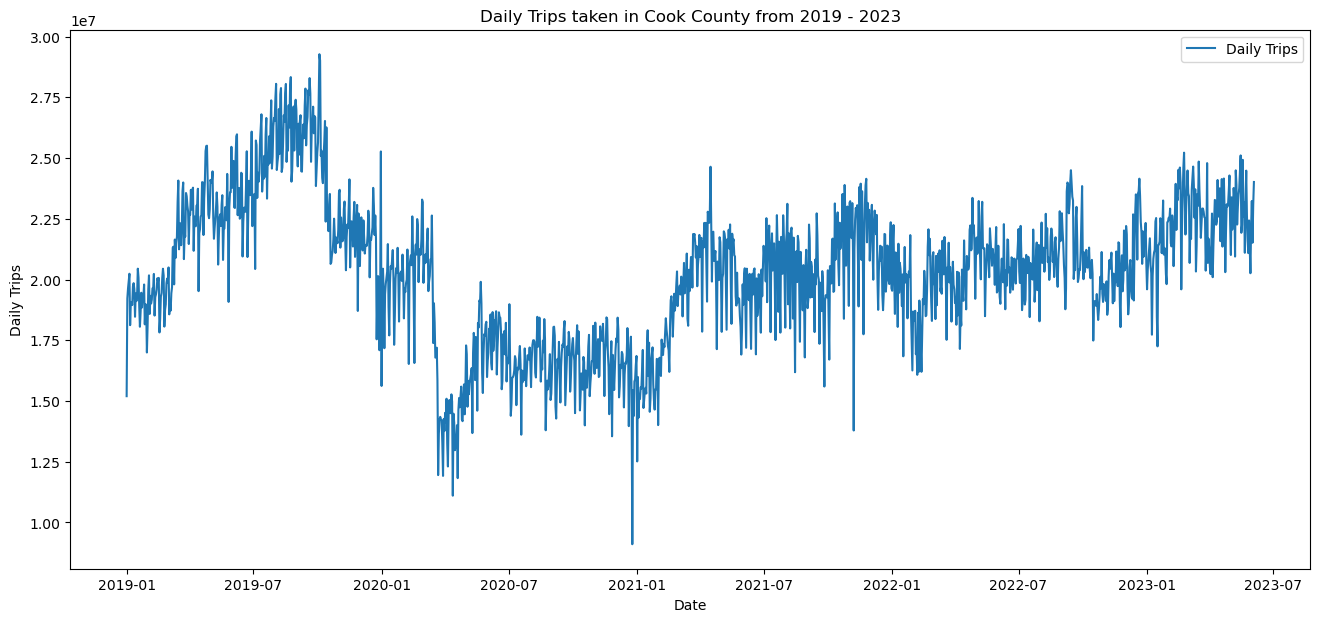

In [10]:
# Plot No of trips in Cook County, IL over time.

plt.figure(figsize=(16, 7))
plt.plot(df_filtered['Number of Trips'], label='Daily Trips',linestyle='solid')
plt.title('Daily Trips taken in Cook County from 2019 - 2023')
plt.xlabel('Date')
plt.ylabel('Daily Trips')
plt.legend()
plt.show()

**TRANSFORM DATASET USING RESAMPLING, LOG AND DIFFERENCING**

In [11]:
# Resampling to average weekly data 

ts=df_filtered['Number of Trips'].resample('W').mean()
ts.tail()

Date
2023-05-07    2.248701e+07
2023-05-14    2.362281e+07
2023-05-21    2.301339e+07
2023-05-28    2.239526e+07
2023-06-04    2.238004e+07
Freq: W-SUN, Name: Number of Trips, dtype: float64

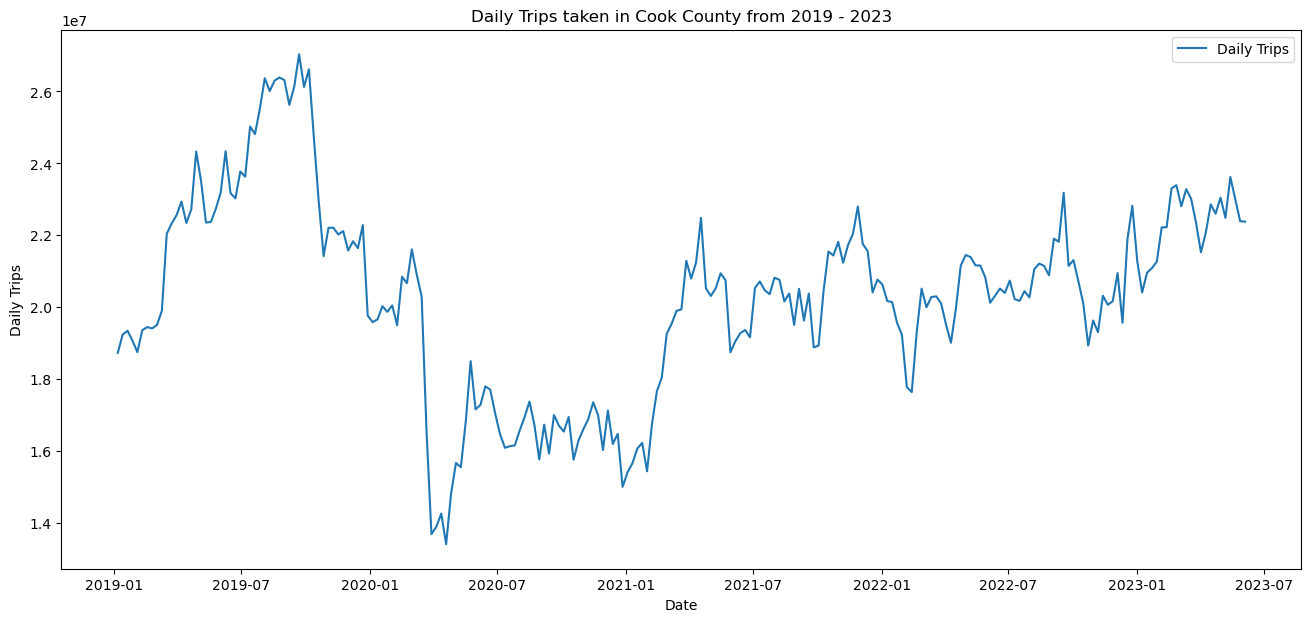

In [12]:
# Plot Resampled data.

plt.figure(figsize=(16, 7))
plt.plot(ts, label='Daily Trips',linestyle='solid')
plt.title('Daily Trips taken in Cook County from 2019 - 2023')
plt.xlabel('Date')
plt.ylabel('Daily Trips')
plt.legend()
plt.show()

**DATASET DECOMPOSITION**

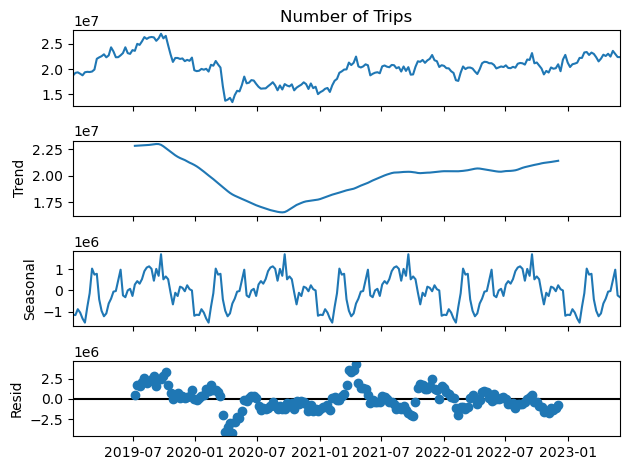

In [13]:
# Decomposing to observe the trend, sesasonality and residual error. It is confirmed the data is a mix of trend, seasonality and residual componenent.

import statsmodels.api as sm
 
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()
plt.show()

**STATIONARITY CHECK ON RESAMPLED DATASET**

In [14]:
# Perform Augmented Dickey-Fuller (ADF) test, to check stationarity.
# ADF Test - null hypothesis - data is non-stationary 
# if p-value < 5% reject null hypothesis
# Result: p-value > 5%, data is not stationary

adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.3647519663260743
p-value: 0.1519329817383625
Critial Values:
   1%, -3.459105583381277
Critial Values:
   5%, -2.8741898504150574
Critial Values:
   10%, -2.5735117958412097


In [15]:
#Log the data, due to high magnitude. This decision is made because every other transformation performed keep giving very high RMSE in all model

df_log=np.log(ts)
df_log

Date
2019-01-06    16.745708
2019-01-13    16.772629
2019-01-20    16.778031
2019-01-27    16.763767
2019-02-03    16.746891
                ...    
2023-05-07    16.928448
2023-05-14    16.977723
2023-05-21    16.951587
2023-05-28    16.924360
2023-06-04    16.923680
Freq: W-SUN, Name: Number of Trips, Length: 231, dtype: float64

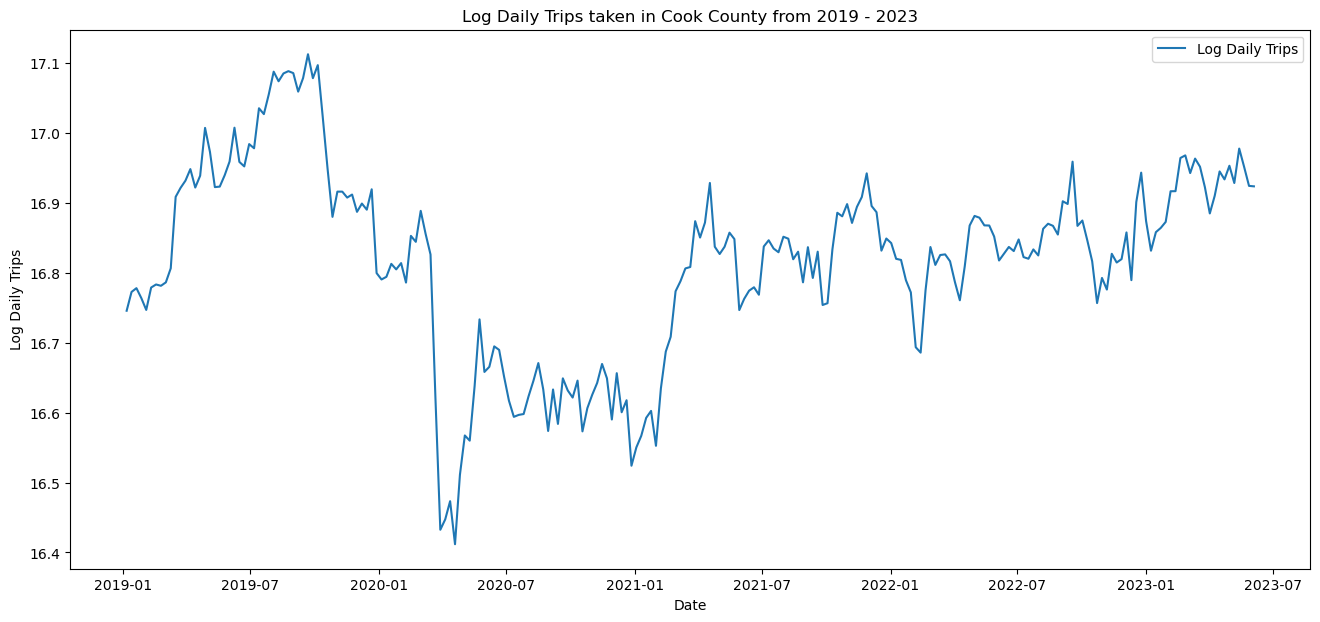

In [16]:
# Plot Log Daily Trips in Cook County, IL over time.

plt.figure(figsize=(16, 7))
plt.plot(df_log, label='Log Daily Trips',linestyle='solid')
plt.title('Log Daily Trips taken in Cook County from 2019 - 2023')
plt.xlabel('Date')
plt.ylabel('Log Daily Trips')
plt.legend()
plt.show()

**STATIONARITY CHECK ON LOG RESAMPLED DATASET**

In [17]:
# Perform Augmented Dickey-Fuller (ADF) test, to check stationarity.
# ADF Test - null hypothesis - data is non-stationary 
# if p-value < 5% reject null hypothesis
# Result: p-value > 5%, data is not stationary. 
# p-value is getting less, so will proceed with log data.

adfuller_result = adfuller(df_log, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.396346355844728
p-value: 0.14277027932635505
Critial Values:
   1%, -3.459105583381277
Critial Values:
   5%, -2.8741898504150574
Critial Values:
   10%, -2.5735117958412097


In [18]:
#Differencing
diff_log=df_log.diff()

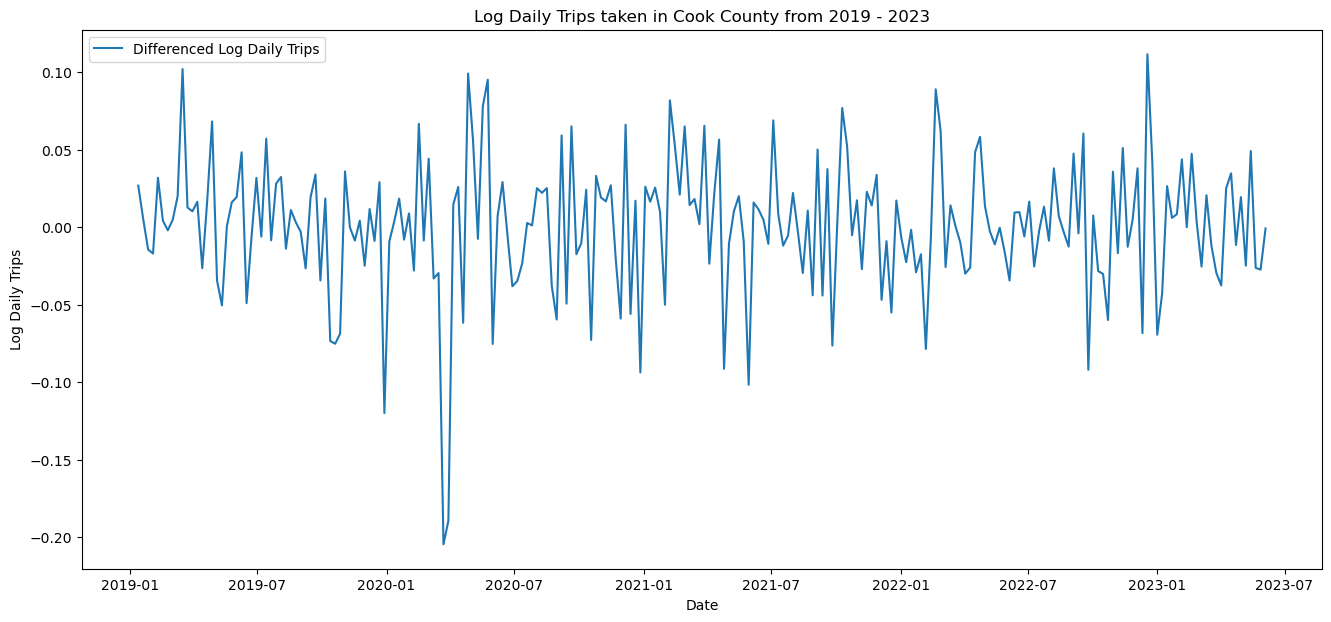

In [19]:
# Plot Differenced Log Daily Trips in Cook County, IL over time.

plt.figure(figsize=(16, 7))
plt.plot(diff_log, label='Differenced Log Daily Trips',linestyle='solid')
plt.title('Log Daily Trips taken in Cook County from 2019 - 2023')
plt.xlabel('Date')
plt.ylabel('Log Daily Trips')
plt.legend()
plt.show()

In [20]:
# check ADF test for stationarity of differenced data.
# p-value is less than 0.05 hence this trasnformed data will be used in modelling & forecasting.

adf1=adfuller(diff_log.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF proved data is now stationary after removing the trend

pvalue of ADF test is : 8.436821668421236e-28


**BUILDING MODEL**

In [21]:
#Train and Test Data 
#75% train, 25% test

len(diff_log)

231

In [22]:
train=diff_log[:172]
test=diff_log[172:]

In [23]:
# Define the ARIMA model using best hyperparameter p=7, d=1, q=7
# Hyperparameter is run at the very last section

model = ARIMA(train, order=(7, 1, 7)).fit()

**PREDICTION USING TRAIN DATA, TO COMPARE WITH TEST DATA**

In [24]:
 # Make prediction based on train data, to compare with test data
    
pred=model.predict(start=len(train),end=(len(diff_log)-1))
pred.head() 

2022-04-24    0.012540
2022-05-01    0.015347
2022-05-08    0.010197
2022-05-15   -0.002394
2022-05-22   -0.012524
Freq: W-SUN, Name: predicted_mean, dtype: float64

**MODEL EVALUATION ON TEST DATA**

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# RMSE is used as error metrics throughout this project

error=np.sqrt(mean_squared_error(test,pred))
error

0.03461964735193192

**PLOTTING ARIMA PREDICTION ON TEST DATA**

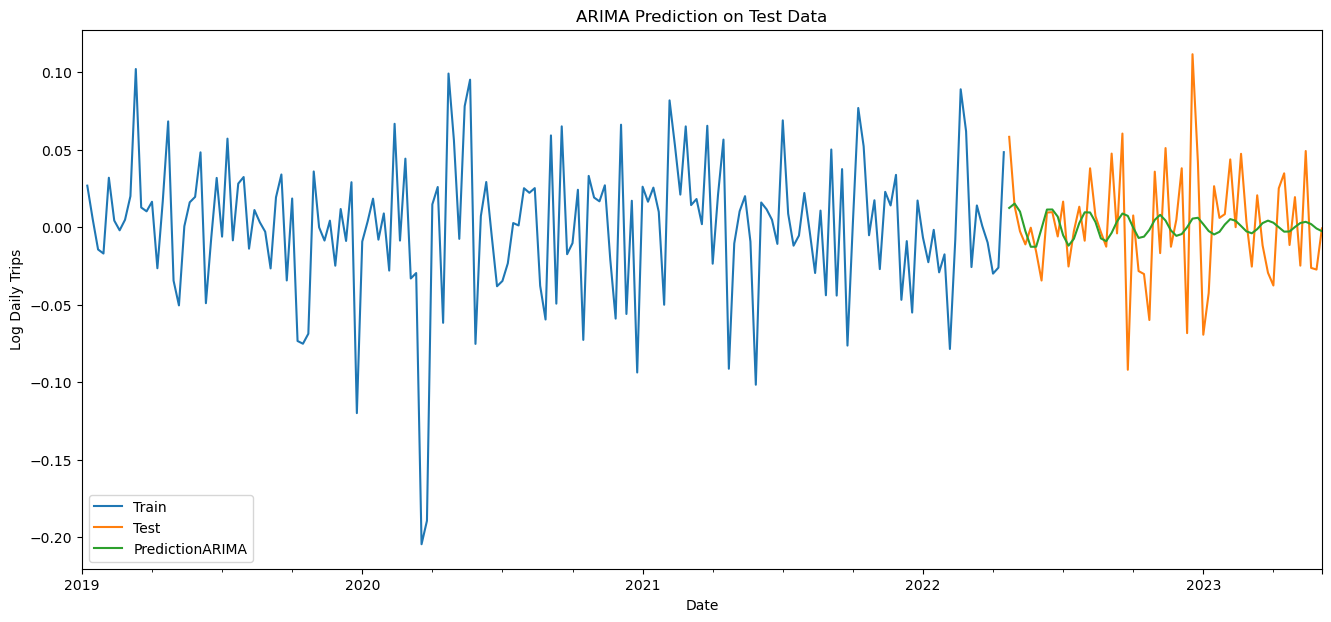

In [27]:


plt.figure(figsize=(16, 7))
train.plot(legend=True, label='Train', figsize=(16,7))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='PredictionARIMA')
plt.title('ARIMA Prediction on Test Data')
plt.xlabel('Date')
plt.ylabel('Log Daily Trips')
plt.legend()
plt.show()

**ARIMA FORECAST**

In [28]:
final_model=ARIMA(diff_log,order=(7,1,7)).fit() #build on full dataset

In [29]:
prediction=final_model.predict(len(diff_log),len(diff_log)+58)   # prediction for next 1 year

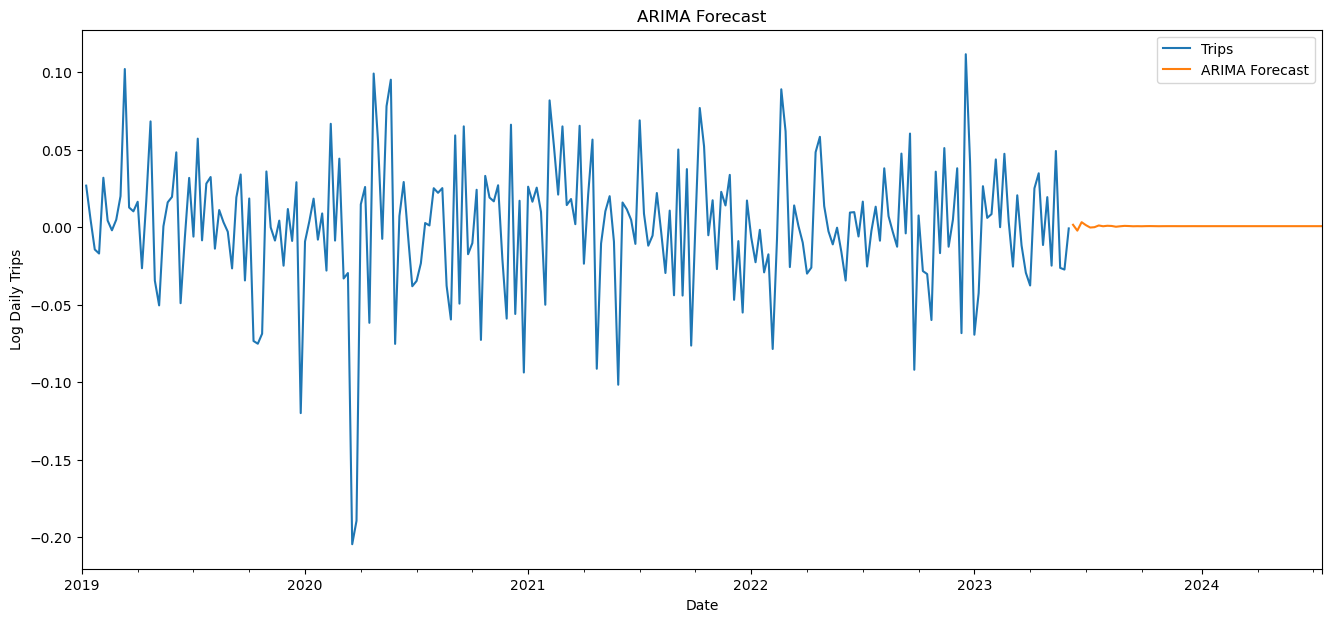

In [30]:
plt.figure(figsize=(16, 7))
diff_log.plot(legend=True, label='Trips',figsize=(16,7))
prediction.plot(legend=True, label='ARIMA Forecast')
plt.title('ARIMA Prediction on Test Data')
plt.xlabel('Date')
plt.ylabel('Log Daily Trips')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [31]:
# RMSE for ARIMA Prediction

np.sqrt(mean_squared_error(test,prediction))

0.03552416931391526

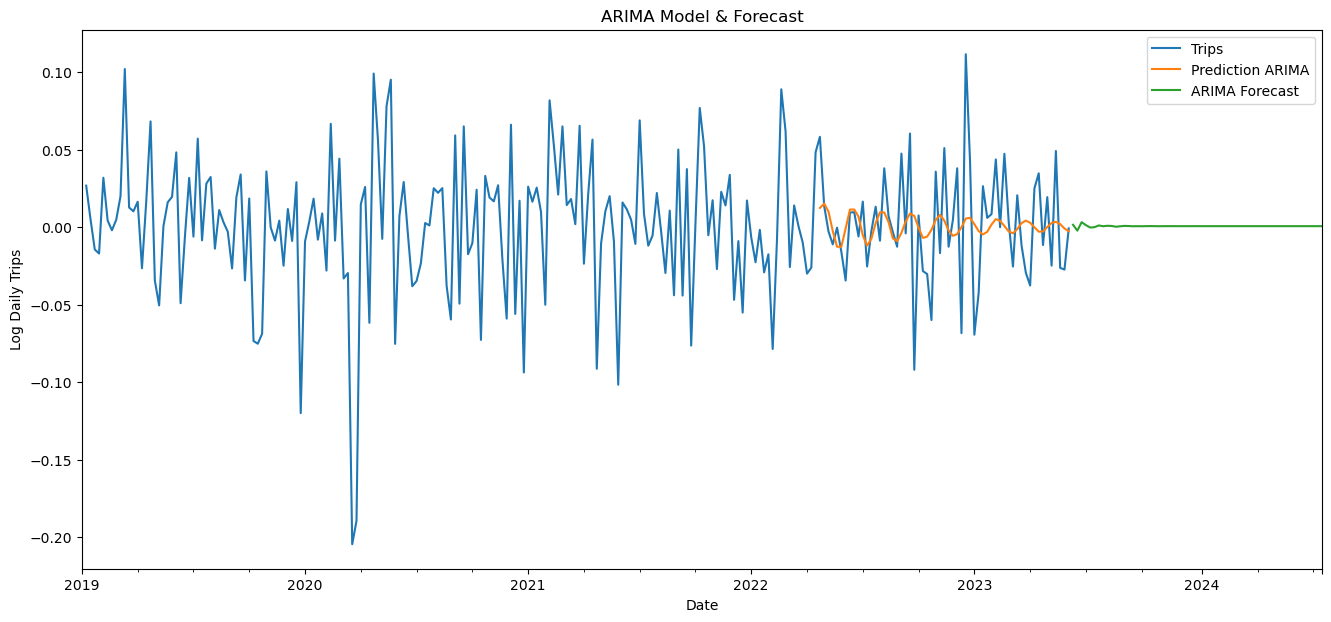

In [32]:
plt.figure(figsize=(16, 7))
diff_log.plot(legend=True, label='Trips',figsize=(16,7))
pred.plot(legend=True, label='Prediction ARIMA')
prediction.plot(legend=True, label='ARIMA Forecast')

plt.title('ARIMA Model & Forecast')
plt.xlabel('Date')
plt.ylabel('Log Daily Trips')
plt.legend()
plt.show()

**SARIMAX MODEL**

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
sarimax_model=SARIMAX(train,order=(7,1,7),seasonal_order=(7,1,7,52)).fit() #build on full dataset, seasonal parameter, S is 52 for weekly data

In [35]:
prediction_sarimax=sarimax_model.predict(start=test.index[0],end=test.index[-1]) 

**PLOTTING ARIMA & SARIMAX PREDICTION AGAINST ORIGINAL TEST DATA WITH SARIMAX FUTURE PREDICTION**

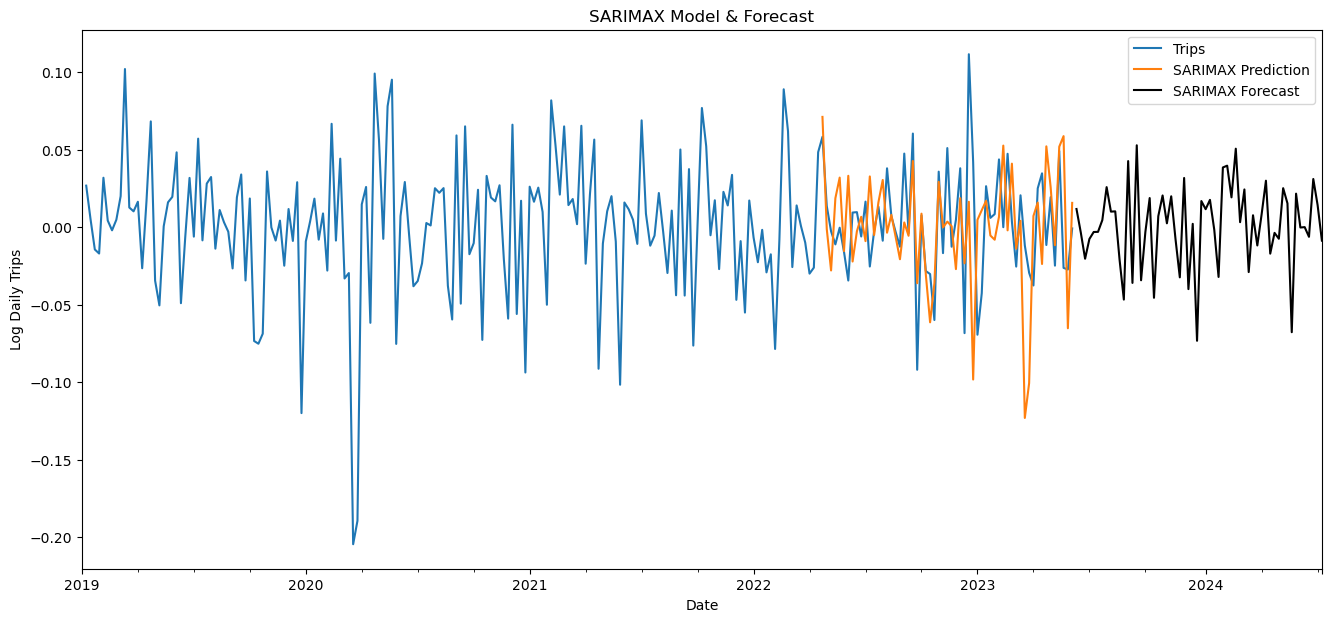

In [36]:
plt.figure(figsize=(16, 7))
diff_log.plot(legend=True, label='Trips',figsize=(16,7))
prediction_sarimax.plot(legend=True, label='SARIMAX Prediction')
sarimax_model.predict(len(diff_log),len(diff_log)+57).plot(legend=True, label='SARIMAX Forecast',color='black') #prediction for next 1 year
plt.title('SARIMAX Model & Forecast')
plt.xlabel('Date')
plt.ylabel('Log Daily Trips')
plt.legend()
plt.show()


In [37]:
# RMSE for SARIMAX Prediction

np.sqrt(mean_squared_error(test,prediction_sarimax))

0.04346590159645273

**PLOTTING BEST FIT LINE ON SARIMAX FORECAST TO SHOW TREND**

In [38]:
from sklearn.linear_model import LinearRegression
forecast_sarimax = sarimax_model=sarimax_model.predict(len(diff_log),len(diff_log)+57) 

# Extract the index and values from the forecast
X = forecast_sarimax.index
y = forecast_sarimax.values

# Convert the DatetimeIndex to numerical values, e.g., using the ordinal representation
X_ordinal = X.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_ordinal, y)

# Print the intercept and coefficients
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: -13.304631638304647
Coefficient: [1.80083181e-05]


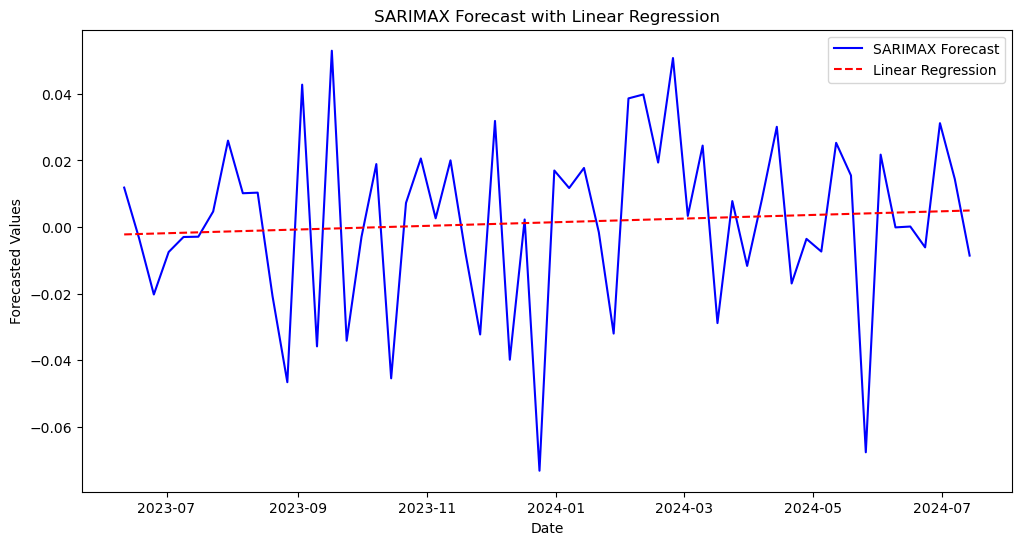

In [39]:
# Generate predictions for the linear regression line
y_pred = lr.predict(X_ordinal)

# Plotting the SARIMAX forecast
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='SARIMAX Forecast', color='blue')

# Plotting the Linear Regression line
plt.plot(X, y_pred, label='Linear Regression', color='red', linestyle='--')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Forecasted Values')
plt.title('SARIMAX Forecast with Linear Regression')
plt.legend()

# Display the plot
plt.show()

**CONVERTING FORECAST MODEL BACK TO REAL VALUE & PLOT LINEAR REGRESSION LINE**

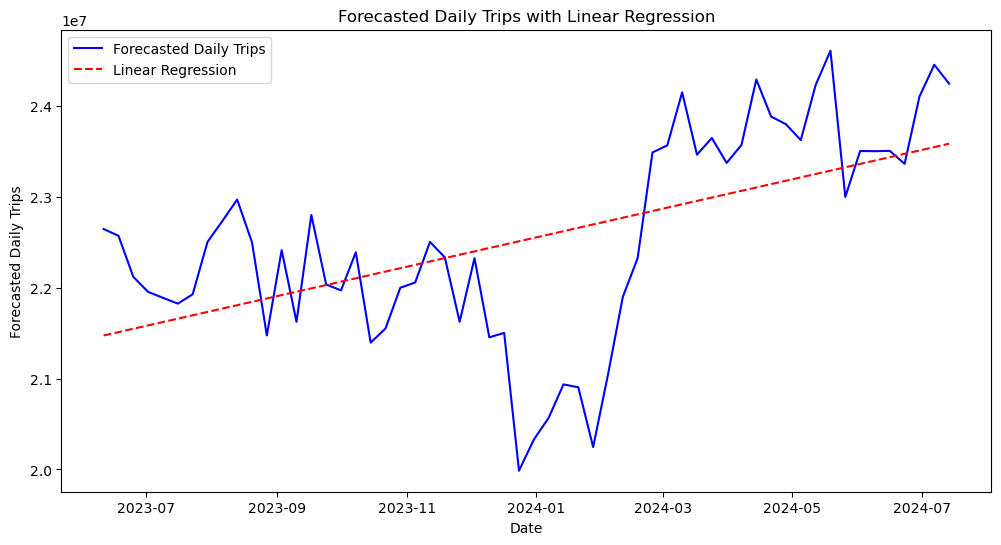

In [40]:
# Reversing the differencing
# df_log is the log-transformed original data
last_log_value = df_log.iloc[-1]

# Cumulative sum to reverse differencing
cumsum_forecast = forecast_sarimax.cumsum()

# Add the last log value to get back to the log scale
log_forecast = last_log_value + cumsum_forecast

# Reverse the log transformation
forecast_real = np.exp(log_forecast)

# Extract the index and values for linear regression
X = forecast_real.index
y = forecast_real.values

# Convert the DatetimeIndex to numerical values, e.g., using the ordinal representation
X_ordinal = X.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_ordinal, y)

# Generate predictions for the linear regression line
y_pred = lr.predict(X_ordinal)

# Plotting the forecasted real values
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Forecasted Daily Trips', color='blue')

# Plotting the Linear Regression line
plt.plot(X, y_pred, label='Linear Regression', color='red', linestyle='--')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Forecasted Daily Trips')
plt.title('Forecasted Daily Trips with Linear Regression')
plt.legend()

# Display the plot
plt.show()

In [41]:
# How much increase in Total Trips a day over a period of 1 year

y_pred[-1]-y_pred[0]

2110869.304634571

In [42]:
np.sqrt(mean_squared_error(forecast_sarimax.values,y_pred))

22539264.84362105

**GET ARIMA HYPERPARAMETERS p,d,q**

In [43]:
import itertools

In [44]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [45]:
pdq_combination=list(itertools.product(p,d,q))

In [46]:
len(pdq_combination)

128

In [47]:
rmse=[]
order1=[]

In [48]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(diff_log_res)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [49]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])

In [50]:
# Sorting the DataFrame in descending order by 'RMSE'
results_sorted = results.sort_values(by='RMSE', ascending=True)

# Displaying the sorted DataFrame
print(results_sorted)


Empty DataFrame
Columns: [RMSE]
Index: []
